In [1]:
# Importng important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

##### Importing Data

In [2]:
pd. set_option("display.max_columns", None)

In [124]:
df = pd.read_csv("/Users/juhimishra/Downloads/Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print('No of rows:',df.shape[0])
print('no of columns:',df.shape[1])

No of rows: 7043
no of columns: 21


In [5]:
# Finding null values, object and int/float in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


only three colmns are in float or integer form rest all are in object and here we can't see any null values in any of the columns

In [6]:
# Checking static data using describe method
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


As describe data shows only continous / integer form column so we can see here only three columns and rest all are in object form 

From above static data following observations recorded:
1. No null values 
2. there may be a less chance of skewness or outliers will see further using skew and outliers technique
3. As we can see that senior citizen column are having two values i.e., 0 and 1 so we can consider it as categorical      column even tenure will also comes under categorical column only

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values even in categorical column too

##### Any null values within the column

In [8]:
df['customerID'].isna().any()

False

In [9]:
# dropping customer id column as not required for our prediction
df.drop(columns=['customerID'],inplace=True)

In [10]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

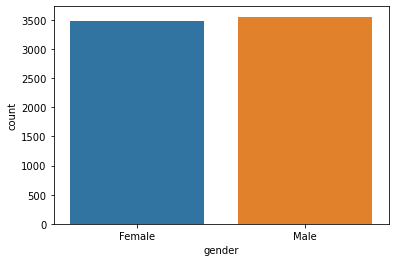

In [12]:
sns.countplot('gender',data=df )

In [13]:
gender_per = ((3555-3488)/3555)*100
gender_per

1.8846694796061885

Compare to male female are approx 1.9% less in industry so not much gap 

In [14]:
df['SeniorCitizen'].unique()

array([0, 1])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

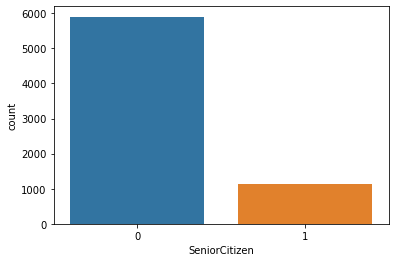

In [15]:
sns.countplot('SeniorCitizen',data=df)

No. of seniourcitizen are less as we can see with the help of countplot here 0 stand for non senior citizen and 1 stands
for senior citizen

In [16]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:xlabel='Partner', ylabel='count'>

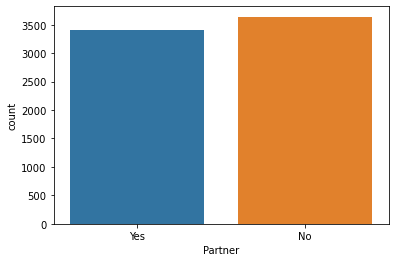

In [17]:
sns.countplot('Partner',data=df)

In [18]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [19]:
partner_per = ((3641-3402)/3641)*100
partner_per

6.564130733315024

As we can see above got only 6.56% of customers who are not in partnership that means most of the customers are doing along with partner 
Concept of partnership in telecom industry are higher.

In [20]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

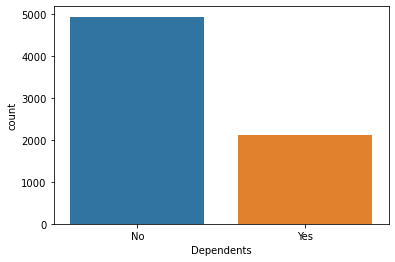

In [21]:
sns.countplot('Dependents',data=df)

In [22]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

almost more than half of the customers are not having dependents

In [23]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

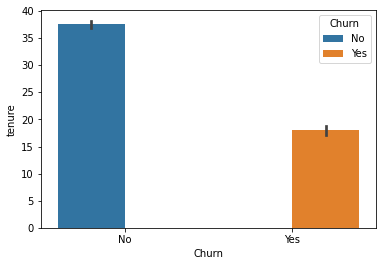

In [24]:
sns.barplot(x='Churn',y = 'tenure',hue = 'Churn',data=df)

Customers with higher tenure stick more to the company

In [25]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

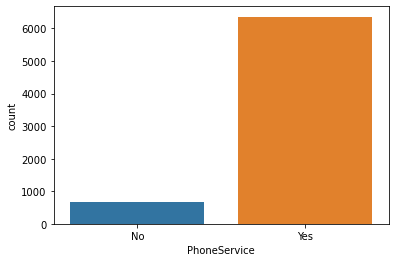

In [26]:
sns.countplot('PhoneService',data=df)

as we can see that most of the customers are getting phone services 

In [27]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [28]:
ph_per = ((6361-682)/6361)*100
ph_per

89.27841534349945

Only 11% of the customers are not getting phone services from telecom industry

In [29]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

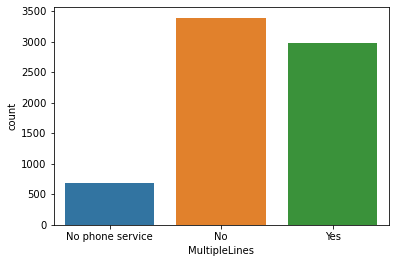

In [30]:
sns.countplot('MultipleLines',data=df)

In [31]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Multiple lines are given only to few customers almost only half of the customers are enjoying this service

In [32]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

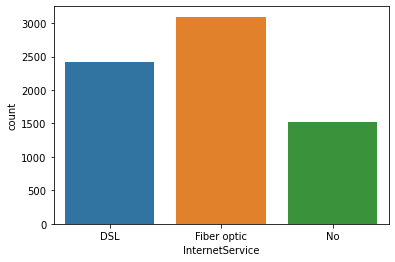

In [33]:
sns.countplot('InternetService',data=df)

In [34]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Most of the customers are getting Fiber optic internet service but there are 1526 customers who doesn't get any service from the industry

In [35]:
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

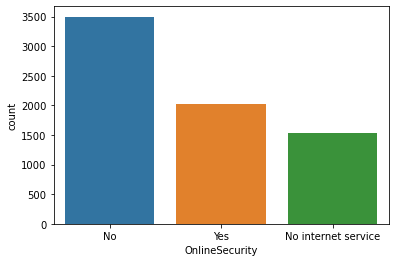

In [36]:
sns.countplot('OnlineSecurity',data=df)

In [37]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Here also we can see that only 2019 customers are getting online securities and above we already got the data that 1526 
customers are not getting internet services so online service will definately be not there for them

In [38]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

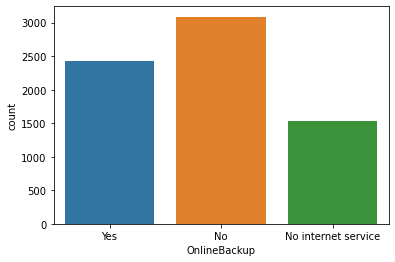

In [39]:
sns.countplot('OnlineBackup',data=df)

In [40]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

Even online backup are also given to few of the customers 

In [41]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

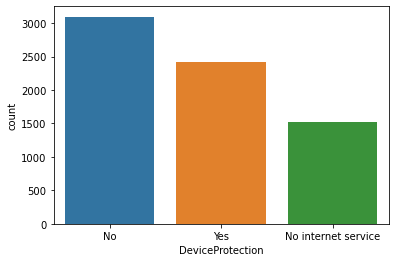

In [42]:
sns.countplot('DeviceProtection',data=df)

In [43]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

Every online services we can see from above are interrelated to each other as here also we can see that only half of the customers 
are getting deviceprotection 

In [44]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

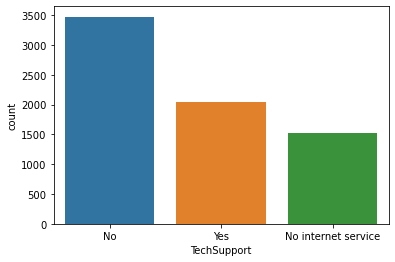

In [45]:
sns.countplot('TechSupport',data=df)

In [46]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

From here we can analyse that from internet services to tech cupport are given to half of the customers by telecom industry. Which may be a reason for churn for many of the customers. will see further by some other visualization method

In [47]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

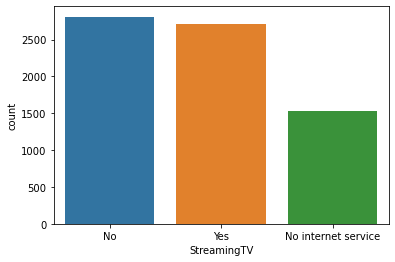

In [48]:
sns.countplot('StreamingTV',data=df)

In [49]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

Here also we analyze the same thing that half of the customers are enjyoing this service

In [50]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

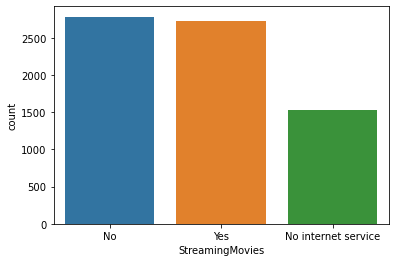

In [51]:
sns.countplot('StreamingMovies',data=df)

In [52]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

same analysis as above .Industry are providing almost all the facilities to almost the same customers

In [53]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='Contract', ylabel='count'>

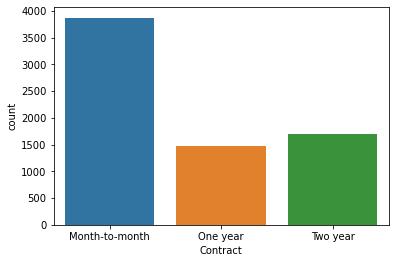

In [54]:
sns.countplot('Contract',data=df)

In [55]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Here we can see that monthly contract are higher than longer one that means most of the customers are doing contract for short period only
And above we seen that one of the reason for churn was short term contract. As long term contract customers stays for longer period

In [56]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

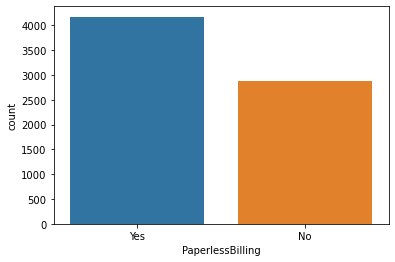

In [57]:
sns.countplot('PaperlessBilling',data=df)

In [58]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

For most of the customers paperless billing protocol being followed 

In [59]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

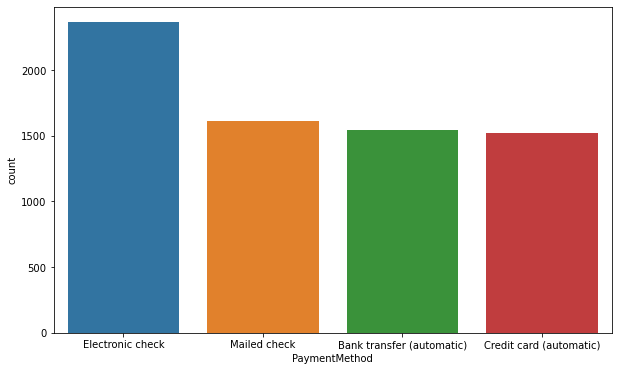

In [60]:
plt.figure(figsize=(10,6))
sns.countplot('PaymentMethod',data=df)

In [61]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Maximum customers are following electronic check method for payment. While credit card and bank transfer mode of payment
having almost same no of customers and least followed by them.

In [62]:
df['MonthlyCharges'].isna().any()

False

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

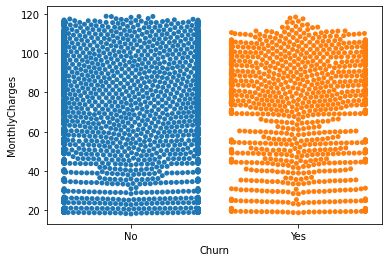

In [63]:
sns.swarmplot(x = 'Churn',y='MonthlyCharges',data=df)

Almost industry are charging monthly charges for half of their customers as we can see above that both yes and no are are almost on the same label.


In [64]:
df['TotalCharges'].isna().any()

False

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

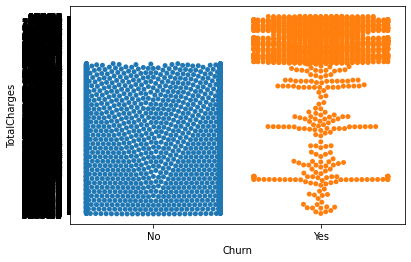

In [65]:
sns.swarmplot(x = 'Churn',y='TotalCharges',data=df)

Total charges also may be one of the reason for churn as we can see that total charges for customers are more even same case was with monthly charges .


In [66]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [67]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

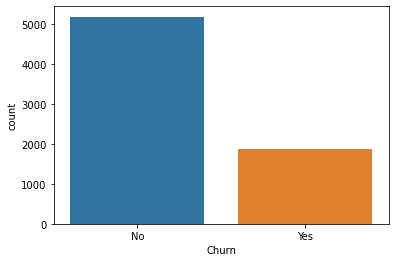

In [68]:
sns.countplot('Churn',data=df)

We can see here the differnce between churn and non-churn data. Clearly it's a non-balanced data 

no null/missing values in any of the column.

### Bivariate Analysis

<AxesSubplot:xlabel='gender', ylabel='count'>

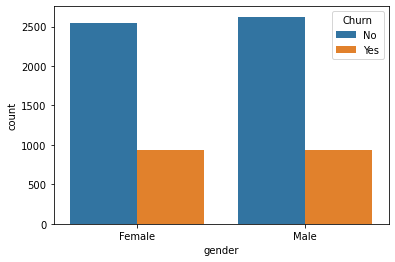

In [69]:
sns.countplot(x='gender',hue='Churn',data=df)

As we can see churn for all the gender is equal either for male or female

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

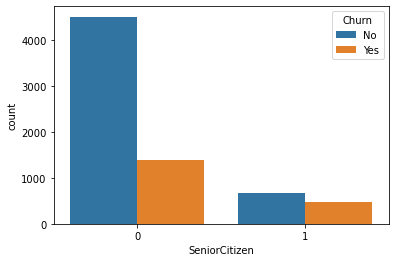

In [70]:
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)

no of senior citizen are less churning compare to non senior citizen

<AxesSubplot:xlabel='Partner', ylabel='count'>

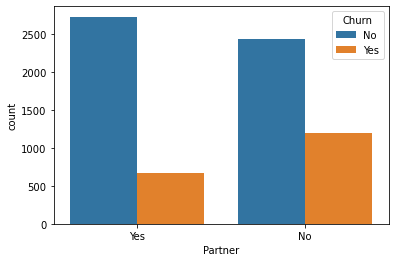

In [71]:
sns.countplot(x='Partner',hue = 'Churn',data=df)

Those who are not in partnership are having more churn 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

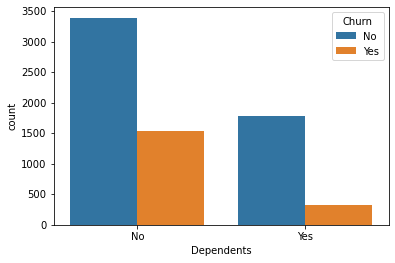

In [72]:
sns.countplot(x='Dependents',hue='Churn',data=df)

Having dependents are not moving to other option compare to those who are independent

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

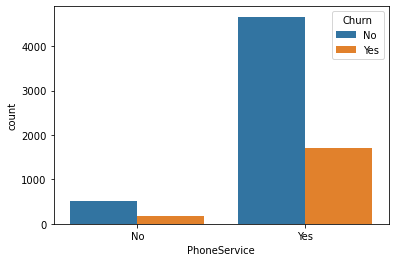

In [73]:
sns.countplot(x='PhoneService',hue='Churn',data=df)

providing ph services to customers are profitable for industry as we can see they are moving less

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

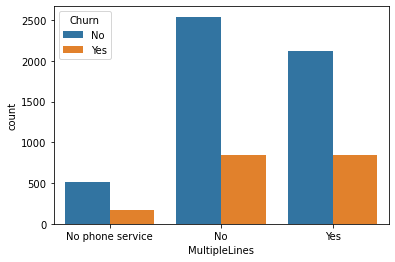

In [74]:
sns.countplot(x='MultipleLines',hue='Churn',data=df)

From above we can see that providing addtional services can attract customers and they stick to the particular client

<AxesSubplot:xlabel='InternetService', ylabel='count'>

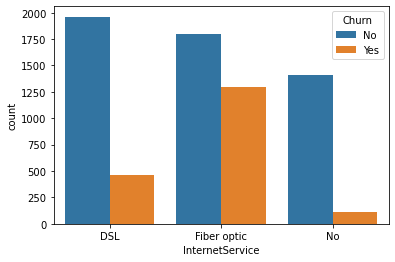

In [75]:
sns.countplot(x='InternetService',hue='Churn',data=df)

DSL services provided more compare to others and as we observed above the same we can see here too

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

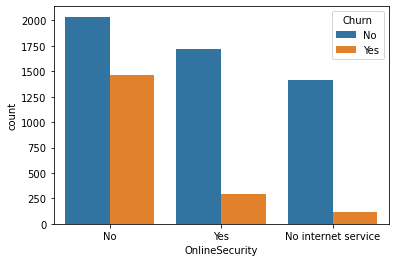

In [76]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=df)

Same observation providing additional services can retain customers to stick to one of the company

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

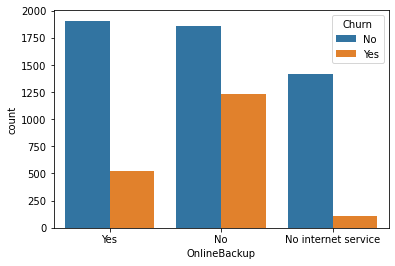

In [77]:
sns.countplot(x='OnlineBackup',hue='Churn',data=df)

Same observed as above

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

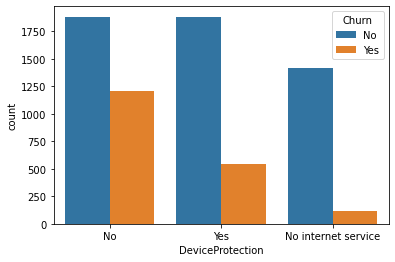

In [78]:
sns.countplot(x='DeviceProtection',hue='Churn',data=df)

Here we can see that only 50% of the customers are getting device protection service and as a result company is loosing more customers

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

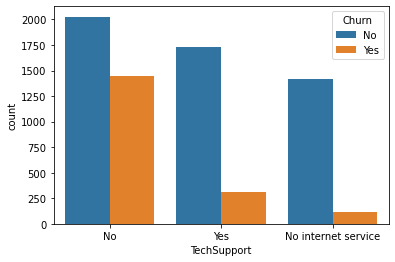

In [79]:
sns.countplot(x='TechSupport',hue='Churn',data=df)

Tech support is also given to less than 50% customers . So we can see that how much the customers are getting services really 
effective for the company

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

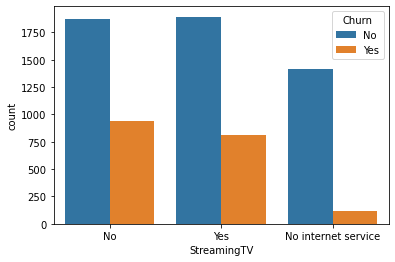

In [80]:
sns.countplot(x='StreamingTV',hue='Churn',data=df)

Same as above

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

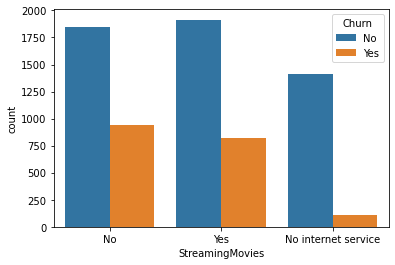

In [81]:
sns.countplot(x='StreamingMovies',hue='Churn',data=df)

Though this service is given to lil more customers compare to other services still result are same

<AxesSubplot:xlabel='Contract', ylabel='count'>

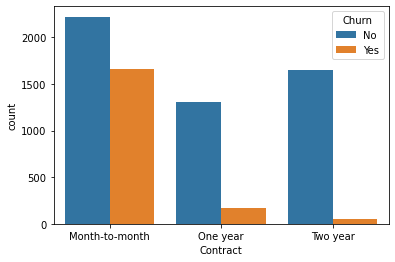

In [82]:
sns.countplot(x='Contract',hue='Churn',data=df)

Here we can see that most of the customers are on a monthly basis contract so the attrition is more but those who are for 
longer period having less churn and this is definately profit for company. So they should look into this and try convert monthly
customers for having longer period contract

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

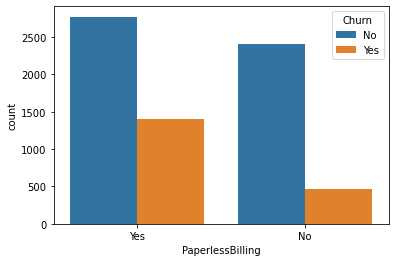

In [83]:
sns.countplot(x='PaperlessBilling',hue='Churn',data=df)

Paperless billing are not only economical but also easy to keep record which are also helpful to have less churn 

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

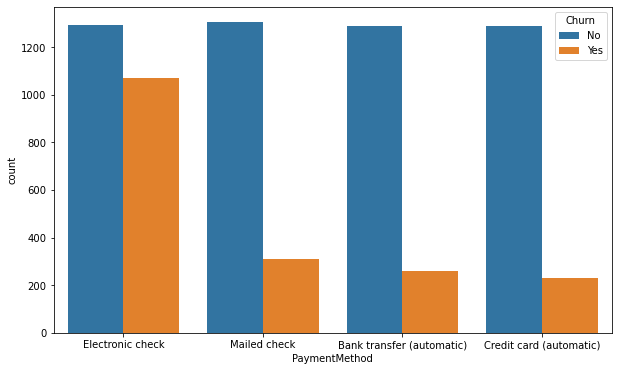

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(x='PaymentMethod',hue='Churn',data=df)

Here we can see that almost all the customers are almost on same label for using payment mode but in electronic check no of loosing cutomers are more compare to others

### Feature Engineering

Applying labelencoder for all binary cases (ie.,yes/no)

In [85]:
# Adding all the additional services 
df['AdditionalServices'] = (df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV'
                               ,'StreamingMovies']]=='Yes').sum(axis=1)

<AxesSubplot:xlabel='AdditionalServices', ylabel='count'>

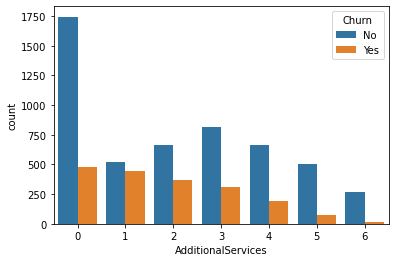

In [86]:
sns.countplot(x='AdditionalServices',hue='Churn',data=df)

Customers who are having high additional services are having less churning rate compare to those who gets less additional services

In [87]:
features_le = ['gender','Partner','Dependents','PhoneService','PaperlessBilling']
def Label_Encoding (features,df):
    for i in features:
        df[i]=df[i].map({'Yes':1,'No':1})
    return
Label_Encoding (['Partner','Dependents','PhoneService','PaperlessBilling',],df)
df['gender'] = df['gender'].map({'Female':1,'Male':0})
df['Churn']=df['Churn'].replace({'Yes':1,'No':0})

In [88]:
le=LabelEncoder()
df1 = le.fit_transform(df['TotalCharges'])
pd.Series(df1)
df['TotalCharges']=df1

#### One Hot Encoding

In [89]:
features_ohe = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
               'StreamingTV','StreamingMovies','Contract','PaymentMethod','AdditionalServices']
df = pd.get_dummies(df,columns=features_ohe)

In [90]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,AdditionalServices_0,AdditionalServices_1,AdditionalServices_2,AdditionalServices_3,AdditionalServices_4,AdditionalServices_5,AdditionalServices_6
0,1,0,1,1,1,1,1,29.85,2505,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
1,0,0,1,1,34,1,1,56.95,1466,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2,0,0,1,1,2,1,1,53.85,157,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,1,45,1,1,42.30,1400,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
4,1,0,1,1,2,1,1,70.70,925,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0


In [91]:
df.shape

(7043, 48)

In [92]:
df.skew()

gender                                     0.019031
SeniorCitizen                              1.833633
Partner                                    0.000000
Dependents                                 0.000000
tenure                                     0.239540
PhoneService                               0.000000
PaperlessBilling                           0.000000
MonthlyCharges                            -0.220524
TotalCharges                               0.015857
Churn                                      1.063031
MultipleLines_No                           0.074752
MultipleLines_No phone service             2.727153
MultipleLines_Yes                          0.316610
InternetService_DSL                        0.658113
InternetService_Fiber optic                0.243494
InternetService_No                         1.375769
OnlineSecurity_No                          0.013350
OnlineSecurity_No internet service         1.375769
OnlineSecurity_Yes                         0.943722
OnlineBackup

In [93]:
con_features=['MonthlyCharges','TotalCharges','tenure']

No skewness in data

In [94]:
con_features = ['MonthlyCharges','TotalCharges','tenure']
df_num = df[con_features]
df_num.describe()
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3-Q1
IQR
((df_num <(Q1-1.5*IQR)) | (df_num > (Q3+1.5*IQR))).any()

MonthlyCharges    False
TotalCharges      False
tenure            False
dtype: bool

No outliers in any of the continous columns

In [95]:
# Checking Correlation
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,AdditionalServices_0,AdditionalServices_1,AdditionalServices_2,AdditionalServices_3,AdditionalServices_4,AdditionalServices_5,AdditionalServices_6
gender,1.000000,0.001874,NaN,NaN,-0.005106,NaN,NaN,0.014569,0.005291,0.008612,-0.004476,-0.006488,0.008414,-0.006568,0.011286,-0.006026,-0.010429,-0.006026,0.017021,-0.008191,-0.006026,0.013773,0.002988,-0.006026,0.002105,-0.003397,-0.006026,0.009212,-0.003267,-0.006026,0.008393,-0.005374,-0.006026,0.010487,0.003386,-0.008026,0.003695,0.016024,-0.001215,-0.000752,-0.013744,-0.012193,0.006269,0.002740,-0.012187,-0.002567,0.021033,0.010612
SeniorCitizen,0.001874,1.000000,NaN,NaN,0.016567,NaN,NaN,0.220173,0.037653,0.150889,-0.136213,-0.008576,0.142948,-0.108322,0.255338,-0.182742,0.185532,-0.182742,-0.038653,0.087952,-0.182742,0.066572,0.094810,-0.182742,0.059428,0.205620,-0.182742,-0.060625,0.049062,-0.182742,0.105378,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477,-0.125052,0.045201,0.052813,0.042924,0.041170,-0.009295,-0.013805
Partner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,-0.005106,0.016567,NaN,NaN,1.000000,NaN,NaN,0.247900,0.158523,-0.352229,-0.323088,-0.008448,0.331941,0.013274,0.019720,-0.039062,-0.263746,-0.039062,0.327203,-0.312694,-0.039062,0.360277,-0.312740,-0.039062,0.360653,-0.262143,-0.039062,0.324221,-0.245039,-0.039062,0.279756,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852,-0.227570,-0.251687,-0.106839,0.076070,0.224247,0.276897,0.272441
PhoneService,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,0.014569,0.220173,NaN,NaN,0.247900,NaN,NaN,1.000000,0.279875,0.193356,-0.338314,-0.247398,0.490434,-0.160189,0.787066,-0.763557,0.360898,-0.763557,0.296594,0.210753,-0.763557,0.441780,0.171836,-0.763557,0.482692,0.322076,-0.763557,0.338304,0.016951,-0.763557,0.629603,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681,0.042812,0.030550,0.271625,-0.377437,-0.720625,0.010768,0.105490,0.221595,0.283701,0.270635,0.235748
TotalCharges,0.005291,0.037653,NaN,NaN,0.158523,NaN,NaN,0.279875,1.000000,0.014479,-0.084489,-0.083195,0.135300,-0.062411,0.202272,-0.171740,0.034335,-0.171740,0.118498,-0.009192,-0.171740,0.158445,-0.022598,-0.171740,0.172564,0.021230,-0.171740,0.132505,-0.052607,-0.171740,0.198408,-0.059210,-0.171740,0.204614,-0.106009,0.041687,0.083705,0.025206,0.025894,0.041220,-0.096529,-0.136388,-0.023312,-0.080653,

In [96]:
df = df.dropna()

<AxesSubplot:>

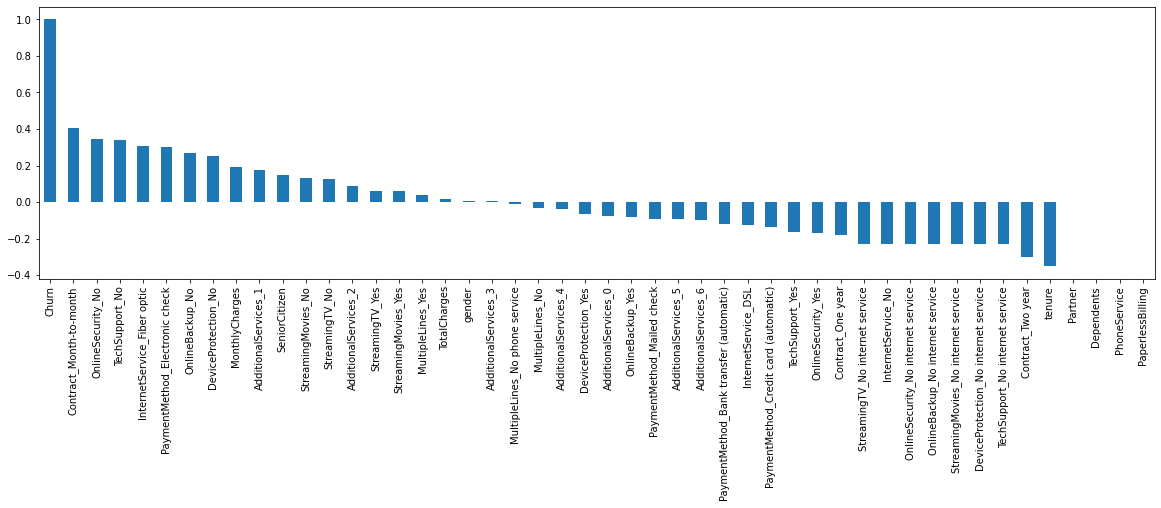

In [97]:
plt.figure(figsize=(15,10))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

##### Balancing the data

In [98]:
## Splitting target and feature variable into x and y
x = df.drop(columns=['Churn'])
y= df['Churn']

In [99]:
x.shape

(7043, 47)

In [100]:
y.shape

(7043,)

In [101]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [103]:
x1,y1 = sm.fit_resample(x,y)

In [104]:
y1.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [105]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x1)
x_scaler

array([[ 1.18525687, -0.39309561,  0.        , ..., -0.31479705,
        -0.24345249, -0.16950071],
       [-0.84369897, -0.39309561,  0.        , ..., -0.31479705,
        -0.24345249, -0.16950071],
       [-0.84369897, -0.39309561,  0.        , ..., -0.31479705,
        -0.24345249, -0.16950071],
       ...,
       [-0.84369897, -0.39309561,  0.        , ..., -0.31479705,
        -0.24345249, -0.16950071],
       [ 1.18525687, -0.39309561,  0.        , ..., -0.31479705,
        -0.24345249, -0.16950071],
       [-0.84369897, -0.39309561,  0.        , ...,  3.1766498 ,
        -0.24345249, -0.16950071]])

## Finding Best Random State

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [108]:
maxaccu = 0
maxrs = 0

for i in range(1,500):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x_scaler,y1,test_size = 0.30,random_state = i)
    dt = DecisionTreeClassifier()
    dt.fit(x1_train,y1_train)
    pred = dt.predict(x1_test)
    acc = accuracy_score(y1_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print("Best Accuracy score is:",maxaccu,"On Random state: ",maxrs)
        

Best Accuracy score is: 0.8238325281803542 On Random state:  437


In [109]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_scaler,y1,random_state=i,test_size=0.30)

In [111]:
DTC = DecisionTreeClassifier()
DTC.fit(x1_train,y1_train)
pred = DTC.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1513
           1       0.83      0.80      0.81      1592

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



In [112]:
print(cross_val_score(DTC,x_scaler,y1,cv=5).mean())

0.7969803611163646


In [113]:
RFC = RandomForestClassifier()
RFC.fit(x1_train,y1_train)
pred =RFC.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)


              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1513
           1       0.87      0.82      0.84      1592

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.85      0.84      0.84      3105



In [115]:
print(cross_val_score(RFC,x_scaler,y1,cv=5).mean())

0.8324482176504787


In [116]:
SV = SVC()
SV.fit(x1_train,y1_train)
pred = SV.predict(x1_test)
acc = classification_report(y1_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1513
           1       0.87      0.82      0.85      1592

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



In [117]:
print(cross_val_score(SV,x_scaler,y1,cv=5).mean())

0.8260704720943861


Though we can see that score for SVC are higher compare to other model but as the differnce between cv score and accuracy score are less for Random Forest Classifier so will do hyperparameter tuning for the same

### ROC AUC curve

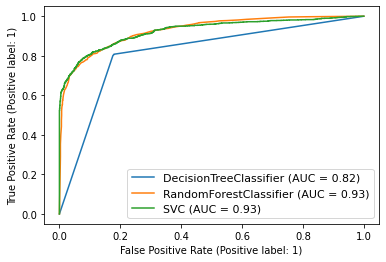

In [135]:
disp = plot_roc_curve(DTC,x1_test,y1_test)

plot_roc_curve(RFC,x1_test,y1_test,ax = disp.ax_) # ax = axes with confusion mtrix

plot_roc_curve(SV,x1_test,y1_test,ax = disp.ax_)

plt.legend(prop={'size':11}, loc = 'lower right')

plt.show()

Though the difference between SVC and Random Forest are very less and both performing well but the differnce between RFC and cv score are less compare to SVC so choosing SVC for hypertuning

# Hyperparameter Tuning

In [121]:
# RandomForestClassifier
param = {'n_estimators':[100,500,700,900],
        'criterion':['gini','entropy'],
        'max_depth':[10,20,30,40,50],
        'max_features':['auto','sqrt','log2'],
        'class_weight':['balanced','balanced_subsample']}

In [122]:
GC = GridSearchCV(RFC,param,cv=5)

In [125]:
GC.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 500, 700, 900]})

In [126]:
GC.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 700}

In [130]:
final_rfc = RandomForestClassifier(class_weight='balanced',criterion= 'entropy',max_depth = 20, max_features = 'sqrt',n_estimators = 700)
final_rfc.fit(x1_train,y1_train)
pred = final_rfc.predict(x1_test)
acc = accuracy_score(y1_test,pred)
print(acc*100)

85.1207729468599


Not much but 1% increase is there in our model performance

# Save the Model

In [132]:
import joblib
joblib.dump(final_rfc,'Finalmodel Telecom Customer Churn')

['Finalmodel Telecom Customer Churn']